In [5]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import clip



OSError: [WinError 127] Nie można odnaleźć określonej procedury. Error loading "C:\Users\mikol\AppData\Roaming\Python\Python311\site-packages\torch\lib\shm.dll" or one of its dependencies.

In [3]:
import sys
import importlib

# Add the directory containing 'clip-file' to sys.path
sys.path.append(r'C:\Mike\DL\Image Video Analysis\backend\venv\Lib\site-packages')

# Dynamically import the 'clip-file' module
clip = importlib.import_module('clip_file')

# Use a function from the 'clip-file' module
clip.some_function()

ModuleNotFoundError: No module named 'clip_file'

In [5]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [ ]:
import statistics


#list of average values of each column with respect to activity 
avg_walking_down = train[train['Activity'] == 'WALKING_DOWNSTAIRS'].drop(columns=['Activity','subject']).mean().tolist()
avg_walking_up = train[train['Activity'] == 'WALKING_UPSTAIRS'].drop(columns=['Activity','subject']).mean().tolist()
avg_sitting = train[train['Activity'] == 'SITTING'].drop(columns=['Activity','subject']).mean().tolist()
avg_standing = train[train['Activity'] == 'STANDING'].drop(columns=['Activity','subject']).mean().tolist()
avg_walking = train[train['Activity'] == 'WALKING'].drop(columns=['Activity','subject']).mean().tolist()
avg_laying = train[train['Activity'] == 'LAYING'].drop(columns=['Activity','subject']).mean().tolist()

column_num = len(avg_walking_down)

#variance of each column. Variance is caluclated based on six values. Those six values are the cells with the same index of 6 list with average value for each column.
variance_of_columns = {}

for i in range(column_num):
    set = [avg_walking_down[i], avg_walking_up[i], avg_sitting[i], avg_standing[i], avg_walking[i], avg_laying[i]]
    var = statistics.variance(set)
    variance_of_columns[i] = var



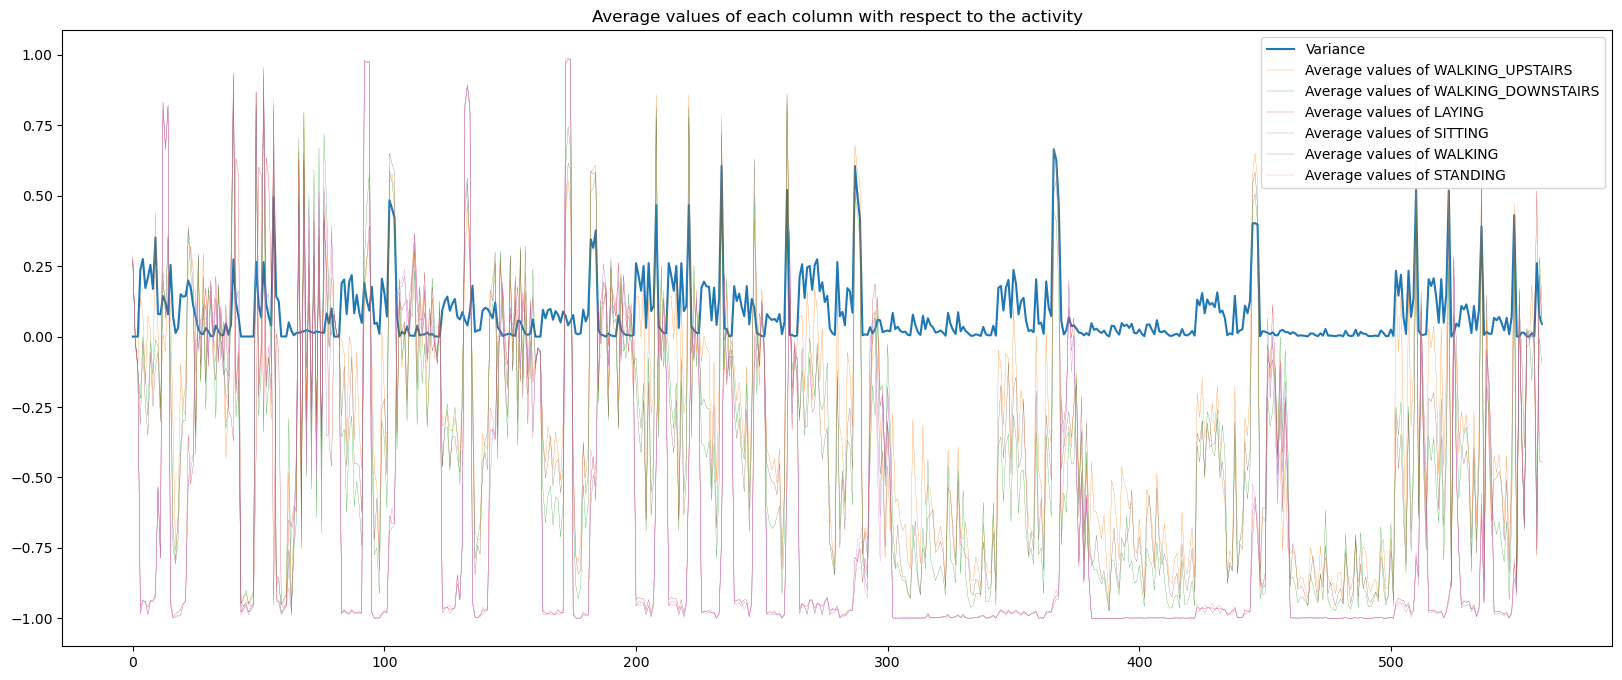

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(variance_of_columns.values(),linewidth = 1.5, label = "Variance")
plt.plot(avg_walking_down,linewidth=0.2,label = "Average values of WALKING_UPSTAIRS")
plt.plot(avg_walking_up,linewidth=0.2,label = "Average values of WALKING_DOWNSTAIRS")
plt.plot(avg_laying,linewidth=0.2,label = "Average values of LAYING")
plt.plot(avg_sitting,linewidth=0.2,label = "Average values of SITTING")
plt.plot(avg_walking,linewidth=0.2,label = "Average values of WALKING")
plt.plot(avg_standing,linewidth=0.2,label = "Average values of STANDING")

plt.title("Average values of each column with respect to the activity")
plt.legend()
plt.show()

In [ ]:
import heapq
#I search for 200 columns with smallest variance
smallest_var_N_columns = heapq.nsmallest(200, variance_of_columns, key=variance_of_columns.get)


In [ ]:
#here I drop 200 columns with lowest varaince of average values from each category
train_dropped = train.drop(train.columns[smallest_var_N_columns], axis=1)
test_dropped = test.drop(test.columns[smallest_var_N_columns], axis=1)

#I save the preproccessed dataset in new files, which i later use in models.ipynb file
train_dropped.to_csv('train_droped.csv', index=False)
test_dropped.to_csv('test_droped.csv', index=False)